<a href="https://colab.research.google.com/github/fathanick/Text-analytics-course-UII/blob/main/03_Text_clustering_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Required Libraries**

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


**Step 2: Prepare the Sample Corpus**

In [ ]:
# Sample corpus
sentences = [
    "I love machine learning and data science.",
    "Data science is fascinating.",
    "Machine learning is a part of artificial intelligence.",
    "Python is a great programming language.",
    "Natural language processing with Python is amazing.",
    "K-means is a clustering algorithm used in machine learning.",
    "I enjoy learning about artificial intelligence and algorithms.",
    "The world of data science and AI is ever-growing.",
    "Python is often used for machine learning.",
    "Natural language processing is a subfield of AI."
]

# Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in sentences]


**Step 4: Train Word2Vec Model to Generate Word Embeddings**

In [ ]:
# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_sentences, vector_size=50, window=3, min_count=1, workers=2)

**Step 5: Extract Word Embeddings**

In [ ]:
# Words to cluster
words = list(word2vec_model.wv.index_to_key)

# Extract word vectors
word_vectors = np.array([word2vec_model.wv[word] for word in words])

**Step 6: Apply Hierarchical Clustering**

We’ll use AgglomerativeClustering to cluster the word embeddings.

In [ ]:
# Apply hierarchical clustering
n_clusters = 3  # Change this value to experiment with different cluster sizes
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(word_vectors)

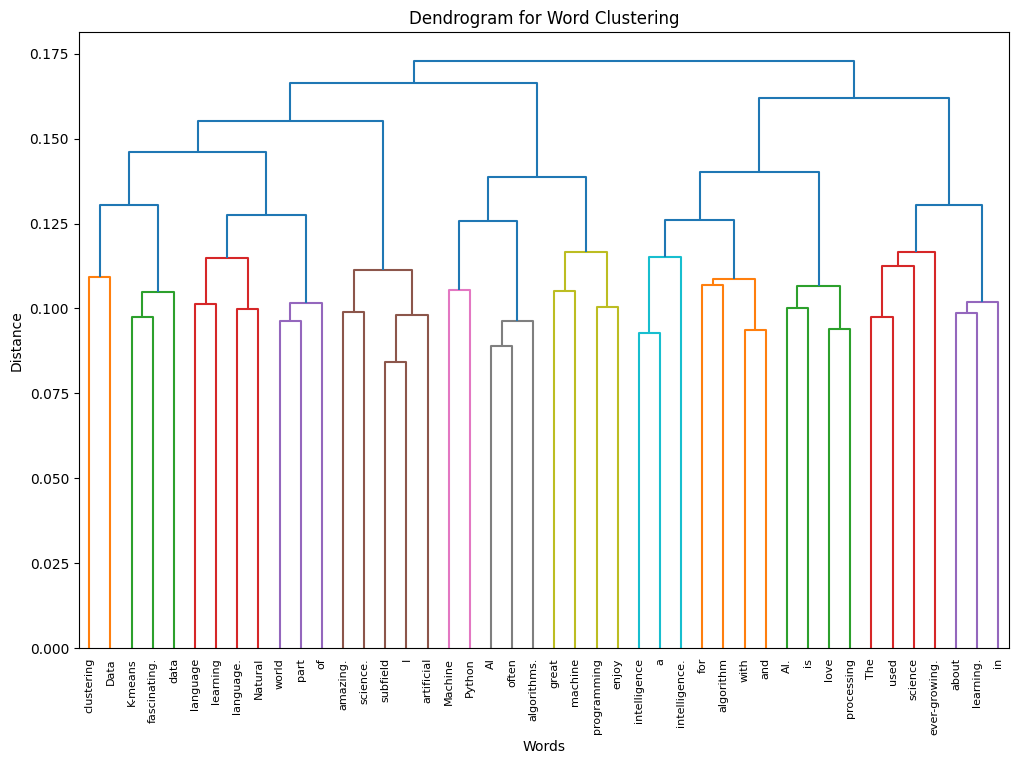

In [ ]:
# Compute the linkage matrix for the dendrogram
linked = linkage(word_vectors, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           labels=words,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Word Clustering')
plt.xlabel('Words')
plt.ylabel('Distance')
plt.show()

**Step 7: Visualize Clusters with t-SNE**

Use t-SNE to reduce the word embeddings to 2D, then plot the words with their clusters.

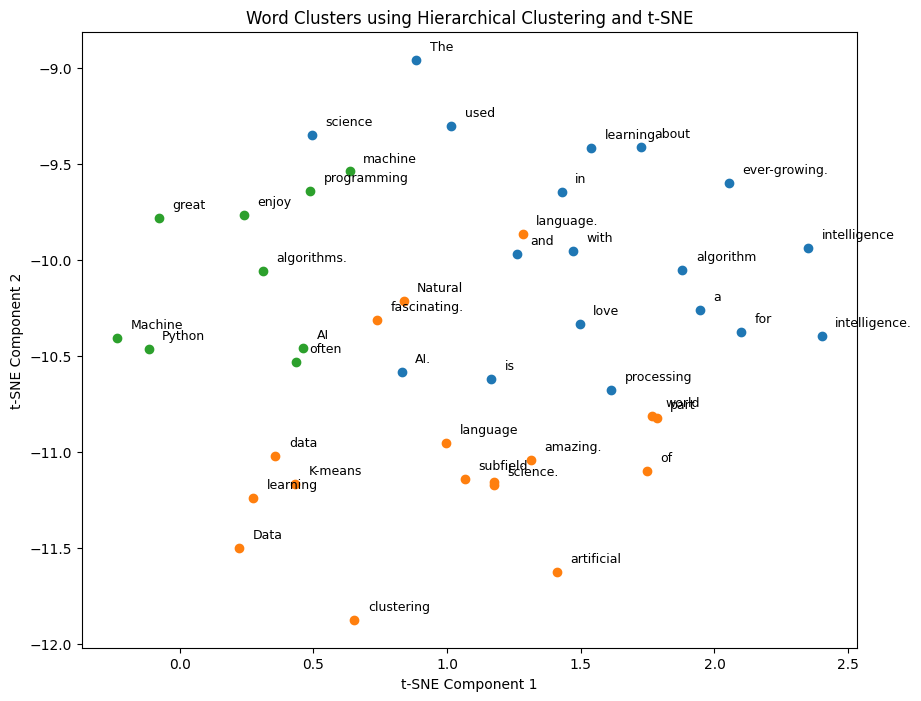

In [ ]:
# Reduce dimensions to 2D with t-SNE
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot words with t-SNE and color by hierarchical cluster
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], c=f'C{hierarchical_labels[i]}')
    plt.text(word_vectors_2d[i, 0] + 0.05, word_vectors_2d[i, 1] + 0.05, word, fontsize=9)
plt.title('Word Clusters using Hierarchical Clustering and t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()